# ***The Empirical Rule and Distribution***

In week 2, we discussed the empirical rule or the rule

# ***`68 - 95 - 99.7`***

which describes how many observations fall within a certain distance from our mean.  This distance from the mean is denoted as sigma, or standard deviation (the average distance an observation is from the mean).

The following image may help refresh your memory:


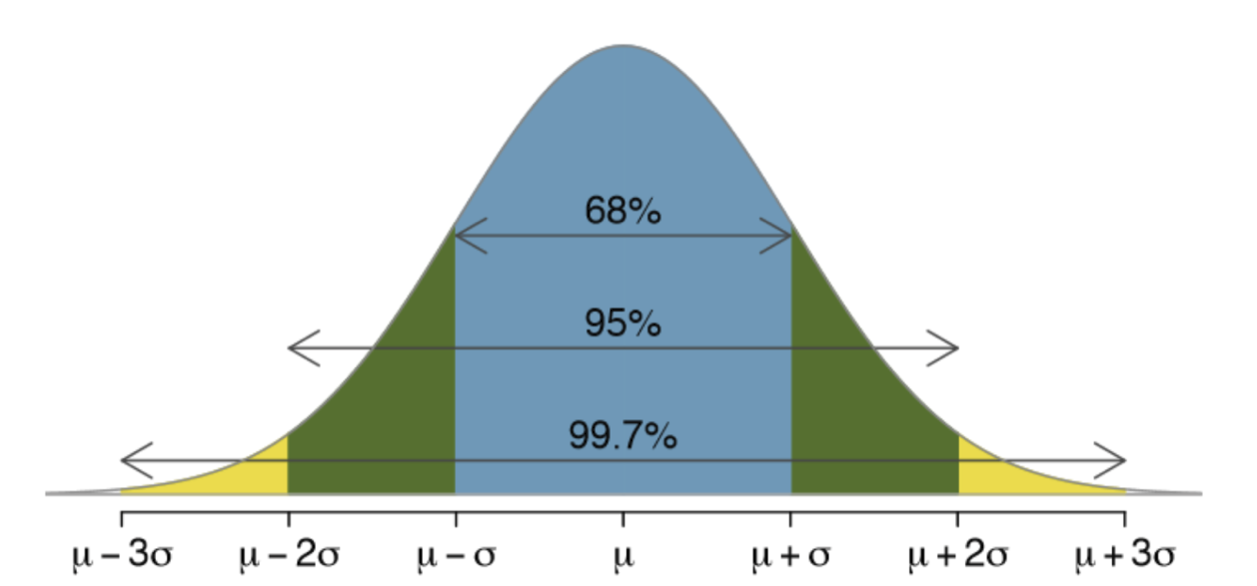

For this tutorial, we will be exploring the number of hours the average college student gets.

The example used in lecture stated there was a mean of 7 and standard deviation of 1.7 for hours of sleep; we will use these same values.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(1738)

In [2]:
#(1) el promedio
mu = 7

#(2) la desviacion estandar
sigma = 1.7

#(3) guardamos en una lista 100000 valores aleatorios de la distribucion normal
# np.random.normal=random.normalvariate
Observations = [np.random.normal(mu, sigma) for x in range(100000)]

#(4) mostramos en pantalla los primeros 10 elementos de la lista
Observations[0:10]


[7.029064044416101,
 6.3378831033696725,
 4.825979880624665,
 7.134479327528984,
 7.812703602705358,
 5.695597135419946,
 5.994924798715146,
 7.052801436273216,
 8.795706385327886,
 5.555725993198681]

In [3]:
#(1) m = promedio de las observaciones obtenidas de los valores aleatorios. Esto viene a ser MU.
m = np.mean(Observations)

#(2) n = desviacion estandar de las observaciones obtenidas de los valores aleatorios. Esto viene a ser SIGMA.
n = np.std(Observations) 

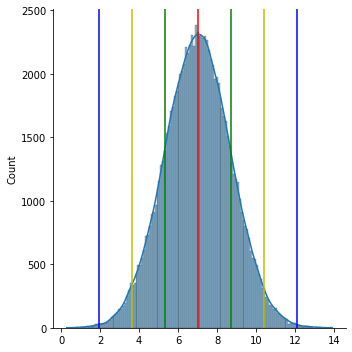

In [4]:
sns.displot(Observations, kde = True)

#(0) aqui mostramos la asintota y=m que muestra donde se encuentra localizada el promedio en el eje x
plt.axvline(m , color = "r")

#(1) mostramos las asintotas y=m+n, y=m-n printadas con color verde (green)
# 68% de los datos
plt.axvline(m + n, color = "g")
plt.axvline(m - n, color = "g")

#(2) mostramos las asintotas y=m+2n, y=m-2n printadas con color amarillo (yellow)
# 95% de los datos
plt.axvline(m + 2*n, color = "y")
plt.axvline(m - 2*n, color = "y")

#(2) mostramos las asintotas y=m+3n, y=m-3n printadas con color amarillo (yellow)
# 99% de los datos
plt.axvline(m + 3*n, color = "b")
plt.axvline(m - 3*n, color = "b")

plt.show() 

In [5]:
# convertimos la lista "Observations" en un dataframe y luego mostramos las estadisticas basicas de este nuevo dataframe usando la funcion "describe"
df=pd.Series(Observations)
df.describe()


count    100000.000000
mean          6.999201
std           1.689774
min           0.292638
25%           5.857016
50%           7.003574
75%           8.135303
max          13.896862
dtype: float64

In [6]:
Sample_A = random.sample(Observations, 100)
Sample_B = random.sample(Observations, 100) 
Sample_C = random.sample(Observations, 100)

In [7]:
# help(plt.subplots)

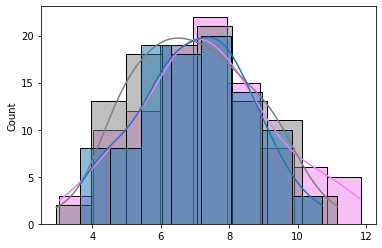

In [8]:
sns.histplot(Sample_A, kde = True, color="violet")
sns.histplot(Sample_B, kde = True, color="gray")
sns.histplot(Sample_C, kde = True)

plt.show()

$ \ $

-----

Now that we have covered the `68 - 95 - 99.7` rule, we will take this a step further and discuss the empirical distribution.


***`The empirical distribution`*** is a cumulative density function that signifies the proportion of observations that are less than or equal to a certain values.



Lets use the initial image above as an example of this concept:



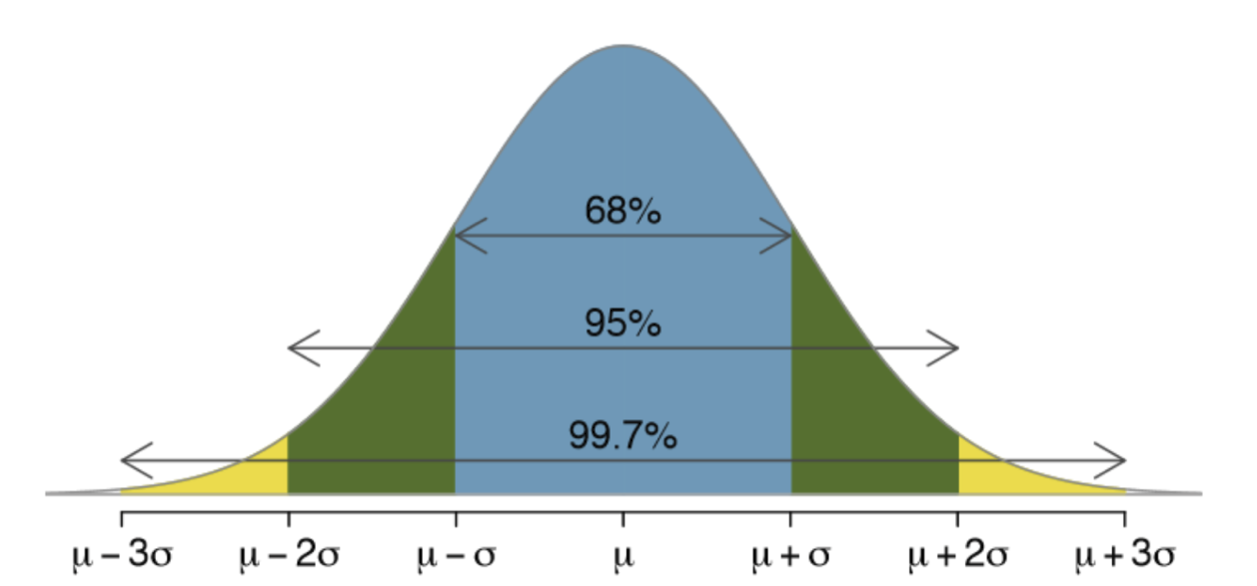

Now, by using our observations for ours of sleep, we can create an empirical distribution in python that signifies the proportion of observations are observed at a specific number for hours of sleep.

In [9]:
#(1) establecemos nuestro promedio en 7
mu = 7

#(2) establecemos nuestra desviacion estandar en 1.7
sigma = 1.7 

In [10]:
#(1) m = promedio de las observaciones obtenidas de los valores aleatorios. Esto viene a ser MU.
m = np.mean(Observations)

#(2) n = desviacion estandar de las observaciones obtenidas de los valores aleatorios. Esto viene a ser SIGMA.
n = np.std(Observations)

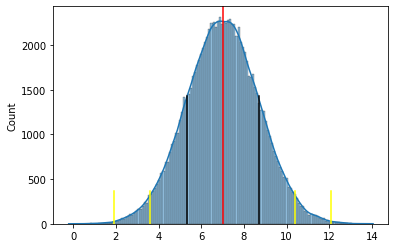

In [11]:
#(1) creamos una lista con 100000 valores aleatorios usando la distribucion normal junto con mu y sigma.
Observations = [np.random.normal(mu, sigma) for x in range(100000)]

#(2) creamos un histograma usando la lista llamada "observations" y mostramos como se veria una posible variable aleatoria continua que aproxima los resultados.
sns.histplot(Observations, kde = True)

#(3) aqui mostramos la asintota y=m que muestra donde se encuentra localizada el promedio en el eje x
plt.axvline(m , color = "r")

#(4) mostramos las asintotas y=m+n, y=m-2n pintadas con color gris (gray)
plt.axvline(m+n, 0, 0.59, color = "black")
plt.axvline(m-n, 0, 0.59, color = "black")

#(5) mostramos las asintotas y=m+2n, y=m-2n pintadas con color amarillo (yellow)
plt.axvline(m+2*n, 0, 0.15, color = "yellow")
plt.axvline(m-2*n, 0, 0.15, color = "yellow")

#(6) mostramos las asintotas y=m+3n, y=m-2n pintadas con color amarillo (yellow)
plt.axvline(m+3*n, 0, 0.15, color = "yellow")
plt.axvline(m-3*n, 0, 0.15, color = "yellow")

#(7) mostramos en pantalla nuestra imagen
plt.show()


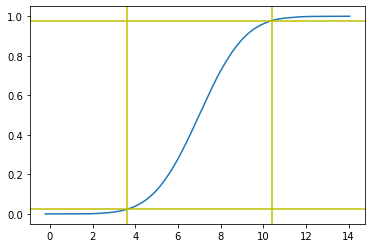

In [12]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

ecdf = ECDF(Observations)

plt.plot(ecdf.x, ecdf.y)

plt.axhline(y = 0.025, color = 'y', linestyle='-')
plt.axvline(x = np.mean(Observations) - (2 * np.std(Observations)), color = 'y', linestyle='-')

plt.axhline(y = 0.975, color = 'y', linestyle='-')
plt.axvline(x = np.mean(Observations) + (2 * np.std(Observations)), color = 'y', linestyle='-')